## Programming Exercise 1 -- Linear Regression
### 1. WarmUpExercise
### 2. Linnear regression with one variable
### 3. Linnear regression with multiple variables 

In [1]:
# %load ../../standard_import.txt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from mpl_toolkits.mplot3d import axes3d

pd.set_option('display.notebook_repr_html', False)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 250)
pd.set_option('display.max_seq_items', None)
 
#%config InlineBackend.figure_formats = {'pdf',}
%matplotlib inline  

import seaborn as sns
sns.set_context('notebook')
sns.set_style('white')

### 1. WarmUpExercise

In [2]:
def warmExercise():
    return np.identity(5)

In [3]:
warmExercise()

array([[ 1.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  1.]])

### 2.  Linnear regression with one variable

In [6]:
### Read data1
data1 = pd.read_csv('ex1data1.txt', header=None, names=['X', 'y'])
# data1.plot.scatter(x='X',y='y', c='r',marker='x')

# print(data1.shape)
# print(data1.head(5))
# X = data1['X'].values
# y = data1['y'].values
X = np.array(data1['X'])
y = np.array(data1['y'])
m =len(y)



#### 2.1 Plotting the Data

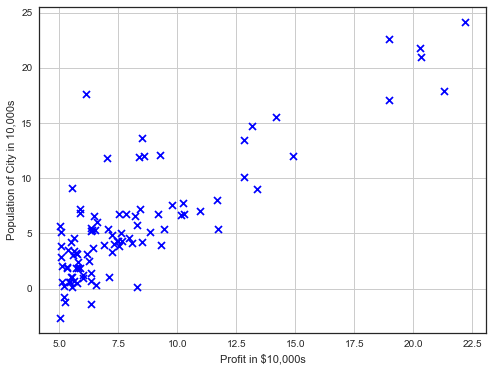

In [8]:
# Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(X, y, c='b', marker='x', linewidths=1)
plt.grid(True)
plt.xlabel('Profit in $10,000s')
plt.ylabel('Population of City in 10,000s')
plt.show()


#### 2.2 Gradient Descent

 The aim of linear regression is to minimize theost function  : $$
\begin{equation*}
J ( \theta ) = \frac{1} {2m} \sum _ {i=1} ^ m ( h _ \theta ( x ^ {(i)} ) - y ^ {(i)} )^2 
\end{equation*}
$$
where hypothesis $h_{\theta}(x)$ is given by the linear model : $$ h_{\theta}(x)=\theta^Tx=\theta_0 + \theta_1x_1 $$
In batch gradient descent, each iteration performs the update simultaneously : $$
\begin{equation*}
\theta _ j = \theta _ j - \alpha \frac{1}{m} \sum _{i=1} ^ m h _{\theta} ( x ^ {(i)} - y ^ {(i)} ) x _ j ^ {(i)}
\end{equation*}
$$



In [31]:
### 
def computeCost(X, y, theta=[[0],[0]]):
    X = np.c_[np.ones(X.shape(0),X)]
    print(X)
    m = y.size
    assert m==97
    J = 1/(2*m)*np.sum(np.square(X.dot(theta) - y))
    return J

In [32]:
computeCost(X, y)

TypeError: 'tuple' object is not callable

In [35]:
np.c_[np.array([1, 1, 1]), np.array([[2, 3, 4],[6, 7, 8]])]

ValueError: all the input array dimensions except for the concatenation axis must match exactly